In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler,normalize,scale

In [2]:

#loading the Dataset
diabetes_df=pd.read_csv("diabetes.csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Correlation Matrix for the given Data 
correlation_matrix = diabetes_df.corr()
print('Regression Data Correlation Matrix:\n', correlation_matrix)



Regression Data Correlation Matrix:
                           Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


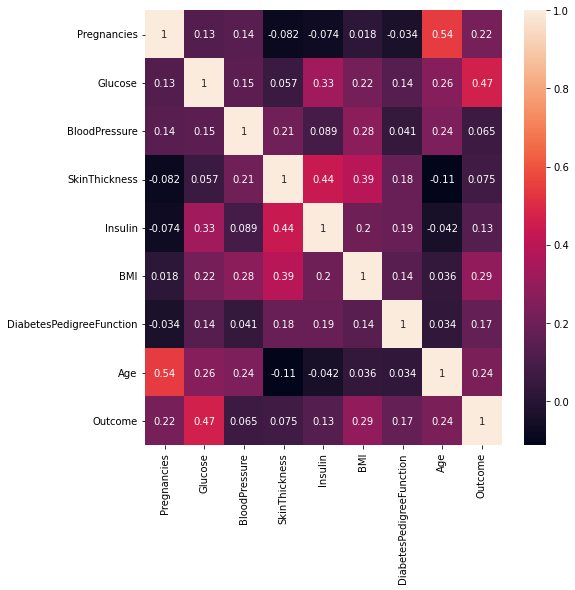

In [5]:
#Plotting the Correlation Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [6]:
#Converting into a numpy Matrix to give it to the model
parameters = np.asmatrix(diabetes_df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
Target_value = np.asmatrix(diabetes_df['Outcome']).T

In [7]:
print(parameters)
#Scaling the features 
parameters=scale(parameters)
parameters

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [8]:
print("Shape of feature matrix",parameters.shape)
print("Shape of Target matrix",Target_value.shape)

Shape of feature matrix (768, 8)
Shape of Target matrix (768, 1)


In [9]:
# Spliting the dataset into train and test datasets. 60% of the dataset for training, 20% for validation and 20% for testing. 
train_x, test_x, train_y, test_y = train_test_split(parameters,Target_value, test_size=0.2,random_state=1)
train_x, x_val, train_y, y_val = train_test_split(train_x, train_y, test_size=0.25)

In [10]:
#Initializing the weights to zeros and size of weight vector is 8 as there are 8 features in the given data
weights = np.asmatrix([0,0,0,0,0,0,0,0]).T
#learning rate=alpha
alpha = 0.01

#intiatilizing the no of iterations=epochs
epochs = 1000


m = train_x.shape[1]

In [11]:
# calculating accuracy 
def calculate_Accuracy(predictions,test_y):
    no_of_cases=0
    for i in range(len(predictions)):
        if(predictions[i]<0.5 and test_y[i]==0):
            no_of_cases=no_of_cases+1
        if(predictions[i]>=0.5 and test_y[i]==1):
            no_of_cases=no_of_cases+1
        
    Accuracy=(no_of_cases/len(test_y))*100
    return Accuracy

In [12]:
total_cost=[]
total_cost_val=[]
train_Accuracy=[]
validation_Accuracy=[]
total_cost=[]
for epoch in range(epochs):
    y_predict= 1 / (1 + np.exp(-np.dot(train_x,weights)))# y_predict= 1 / (1 + np.exp(-np.dot(train_x,weights)))
    y_predict_val= 1 / (1 + np.exp(-np.dot(x_val,weights)))
   
    
    gradient=np.dot(train_x.transpose(), (y_predict-train_y) )# gradient descent=  np.dot(train_x.transpose(), (predict-train_y) )
    cost_function = -np.sum(np.multiply(np.log(y_predict), train_y) + np.multiply((1 - train_y), np.log(1 - y_predict)))/m 
    cost_function_val = -np.sum(np.multiply(np.log(y_predict_val), y_val) + np.multiply((1 - y_val), np.log(1 - y_predict_val)))/m 
    weights=weights - alpha * gradient
    
    # Calculate cost function for training data and validation data and then update the weights
    train_predictions= 1 / (1 + np.exp(-np.dot(train_x,weights)))
    train_Accuracy.append(np.squeeze(calculate_Accuracy(train_predictions,train_y)))

    validation_predictions=1 / (1 + np.exp(-np.dot(x_val,weights)))
    validation_Accuracy.append(np.squeeze(calculate_Accuracy(validation_predictions,y_val)))
    
    # Calculate train and validation predicts also and then compute the total cost for training and validation data
    total_cost.append(np.squeeze(cost_function))
    total_cost_val.append(np.squeeze(cost_function_val))

In [13]:
#Train accuracy in every epoch
print(train_Accuracy)
print(train_Accuracy[0])

[array(71.73913043), array(73.69565217), array(73.47826087), array(73.26086957), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(72.82608696), array(72.82608696), array(72.82608696), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826), array(73.04347826),

In [14]:
#Validation accuracy in every epoch
print(validation_Accuracy)

[array(74.02597403), array(71.42857143), array(72.07792208), array(73.37662338), array(73.37662338), array(74.02597403), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338), array(73.37662338),

# Plotting graph between Training and Validation Accuracy

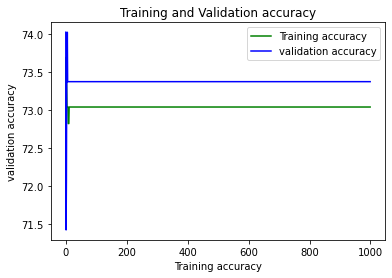

In [15]:
plt.plot(range(epochs), train_Accuracy, 'g', label='Training accuracy')
plt.plot(range(epochs), validation_Accuracy, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Training accuracy')
plt.ylabel('validation accuracy')
plt.legend();

# Plotting graph between Training and Validation loss

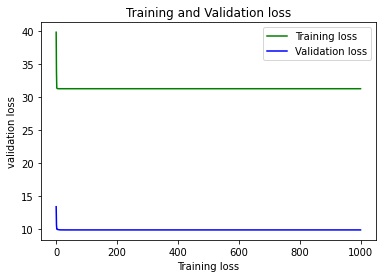

In [16]:
plt.plot(range(epochs), total_cost, 'g', label='Training loss')
plt.plot(range(epochs), total_cost_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Training loss')
plt.ylabel('validation loss')
plt.legend();

In [17]:
#Calculating train accuracy
train_predictions= 1 / (1 + np.exp(-np.dot(train_x,weights)))
train_accuracy=calculate_Accuracy(train_predictions,train_y)
print(train_accuracy)





73.04347826086956


In [18]:


#Calculating validation accuracy
val_predictions= 1 / (1 + np.exp(-np.dot(x_val,weights)))
val_accuracy=calculate_Accuracy(validation_predictions,y_val)
print(val_accuracy)

73.37662337662337


In [19]:

#Calculating test accuracy
test_predictions= 1 / (1 + np.exp(-np.dot(test_x,weights)))
test_accuracy=calculate_Accuracy(test_predictions,test_y)
print(test_accuracy)
 

77.27272727272727


In [20]:
test_predictions.shape
val_predictions.shape
test_predictions.shape

(154, 1)

# Plotting graph between Total Cost and Epochs


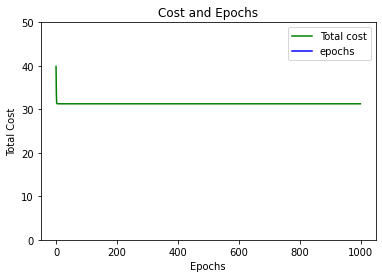

In [21]:
# plotting graph of epochs vs cost_function/loss function
plt.plot(total_cost, 'g', label='Total cost')
plt.plot(epochs, 'b', label='epochs')
plt.title('Cost and Epochs')
plt.xlabel('Epochs')
plt.ylabel('Total Cost')
plt.ylim(0,50)
plt.legend();

# Neural Networks

In [22]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("diabetes.csv")
data = df.to_numpy(dtype=np.float64)

X = data[:,:8]
Y = data[:,-1]

x_train_val, x_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.20)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25)

y_train = to_categorical(y_train, num_classes=None, dtype='float64')
y_test = to_categorical(y_test, num_classes=None, dtype='float64')
y_val = to_categorical(y_val, num_classes=None, dtype='float64')

print(x_train.shape[0])
print(x_val.shape[0])
print(x_test.shape[0])
print(y_val.shape[0])

460
154
154
154


In [24]:
prototype = Sequential()
prototype.add(Dense(500, input_dim=8, activation='relu',activity_regularizer=regularizers.l2(1e-4)))
prototype.add(Dense(100, activation='relu',activity_regularizer=regularizers.l2(1e-4)))
prototype.add(Dense(2, activation='softmax'))
prototype.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [25]:
epochs = 450
batch_size = 8
history = prototype.fit(x_train,y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/450
58/58 [==============================] - 1s 7ms/step - loss: 4.1531 - accuracy: 0.6217 - val_loss: 2.0866 - val_accuracy: 0.6818
Epoch 2/450
58/58 [==============================] - 0s 3ms/step - loss: 1.8434 - accuracy: 0.6391 - val_loss: 1.3130 - val_accuracy: 0.6429
Epoch 3/450
58/58 [==============================] - 0s 3ms/step - loss: 1.1640 - accuracy: 0.6587 - val_loss: 0.9373 - val_accuracy: 0.6234
Epoch 4/450
58/58 [==============================] - 0s 3ms/step - loss: 0.8791 - accuracy: 0.6630 - val_loss: 0.7524 - val_accuracy: 0.7013
Epoch 5/450
58/58 [==============================] - 0s 3ms/step - loss: 0.7662 - accuracy: 0.6630 - val_loss: 0.7483 - val_accuracy: 0.7143
Epoch 6/450
58/58 [==============================] - 0s 3ms/step - loss: 0.7244 - accuracy: 0.6870 - val_loss: 0.6698 - val_accuracy: 0.6299
Epoch 7/450
58/58 [==============================] - 0s 4ms/step - loss: 0.6778 - accuracy: 0.6739 - val_loss: 0.6542 - val_accuracy: 0.6623
Epoch 8/450
5

In [38]:
print("Train acc-",history.history["accuracy"][-1])
print("Val acc-",history.history["val_accuracy"][-1])
print("Training loss-", history.history["loss"][-1])


Train acc- 0.936956524848938
Val acc- 0.6753246784210205
Training loss- 0.1639959216117859


In [39]:
test_results = prototype.evaluate(x=x_test, y=y_test)

5/5 [==============================] - 0s 2ms/step - loss: 1.1028 - accuracy: 0.7597


In [40]:
test_results

[1.1028388738632202, 0.7597402334213257]

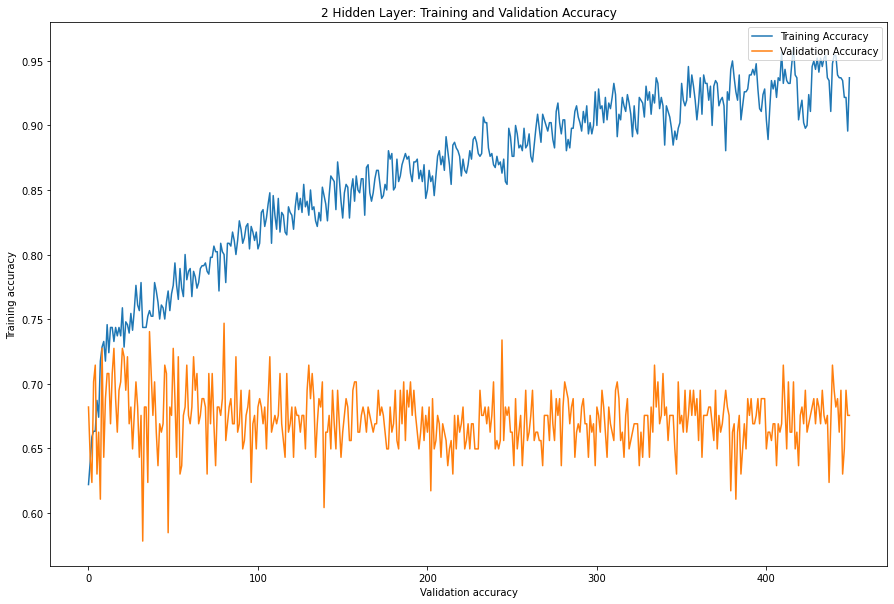

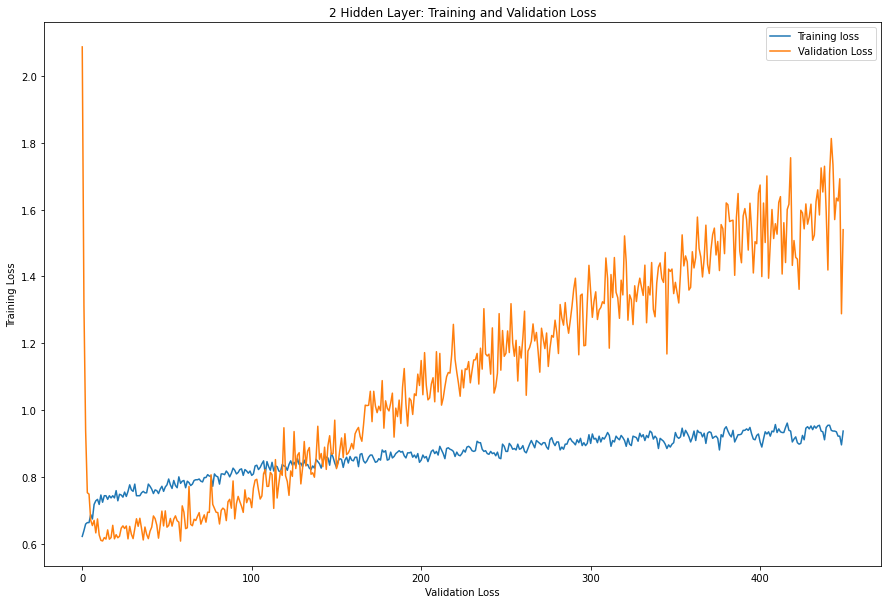

In [61]:
# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('2 Hidden Layer: Training and Validation Accuracy')
plt.ylabel('Training accuracy')
plt.xlabel('Validation accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

# Loss
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('2 Hidden Layer: Training and Validation Loss')
plt.ylabel('Training Loss')
plt.xlabel('Validation Loss')
plt.legend(['Training loss', 'Validation Loss'], loc='upper right')
plt.show()

In [57]:
#BONUS PART-3 IMPLEMENTING L1 REGULARIZATION 


In [42]:
prototype1 = Sequential()
prototype1.add(Dense(500, input_dim=8, activation='relu',activity_regularizer=regularizers.l1(1e-4)))
prototype1.add(Dense(100, activation='relu',activity_regularizer=regularizers.l1(1e-4)))
prototype1.add(Dense(2, activation='sigmoid'))
prototype1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [43]:
epochs = 400
batch_size = 8
history1 = prototype1.fit(x_train,y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/400
58/58 [==============================] - 1s 6ms/step - loss: 2.3126 - accuracy: 0.5783 - val_loss: 2.6194 - val_accuracy: 0.6494
Epoch 2/400
58/58 [==============================] - 0s 4ms/step - loss: 1.7428 - accuracy: 0.5870 - val_loss: 0.9491 - val_accuracy: 0.6948
Epoch 3/400
58/58 [==============================] - 0s 5ms/step - loss: 1.1751 - accuracy: 0.6174 - val_loss: 1.3160 - val_accuracy: 0.5974
Epoch 4/400
58/58 [==============================] - 0s 4ms/step - loss: 1.2296 - accuracy: 0.6348 - val_loss: 1.8704 - val_accuracy: 0.6429
Epoch 5/400
58/58 [==============================] - 0s 4ms/step - loss: 1.1203 - accuracy: 0.6565 - val_loss: 1.2484 - val_accuracy: 0.5260
Epoch 6/400
58/58 [==============================] - 0s 3ms/step - loss: 1.0498 - accuracy: 0.6565 - val_loss: 1.4911 - val_accuracy: 0.6429
Epoch 7/400
58/58 [==============================] - 0s 4ms/step - loss: 0.9377 - accuracy: 0.6543 - val_loss: 0.9030 - val_accuracy: 0.6039
Epoch 8/400
5

In [44]:
print("Train acc-",history1.history["accuracy"][-1])
print("Val acc-",history1.history["val_accuracy"][-1])
print("Training loss-", history1.history["loss"][-1] )

Train acc- 0.897826075553894
Val acc- 0.6623376607894897
Training loss- 0.24957261979579926


In [45]:
test_results = prototype1.evaluate(x=x_test, y=y_test)

5/5 [==============================] - 0s 3ms/step - loss: 1.5294 - accuracy: 0.7597


In [46]:
test_results

[1.5293761491775513, 0.7597402334213257]

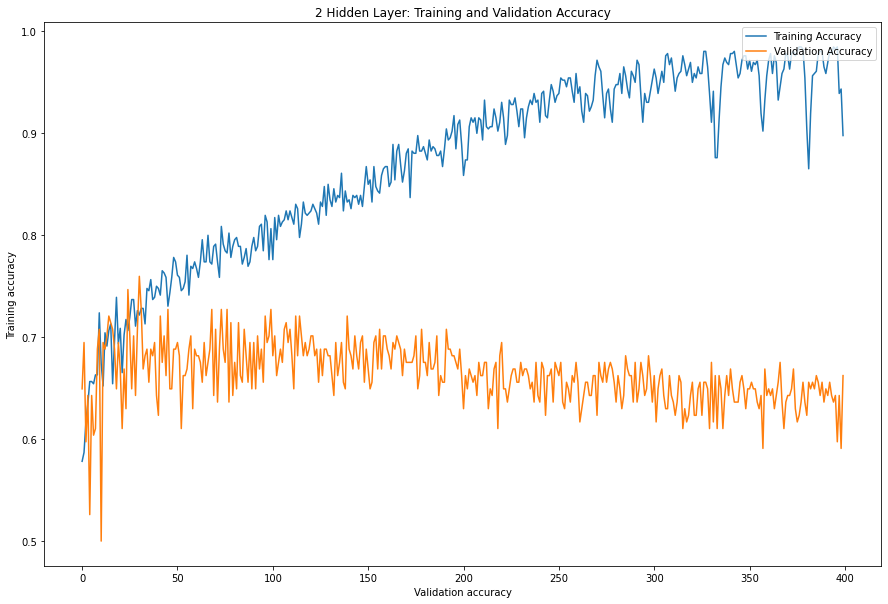

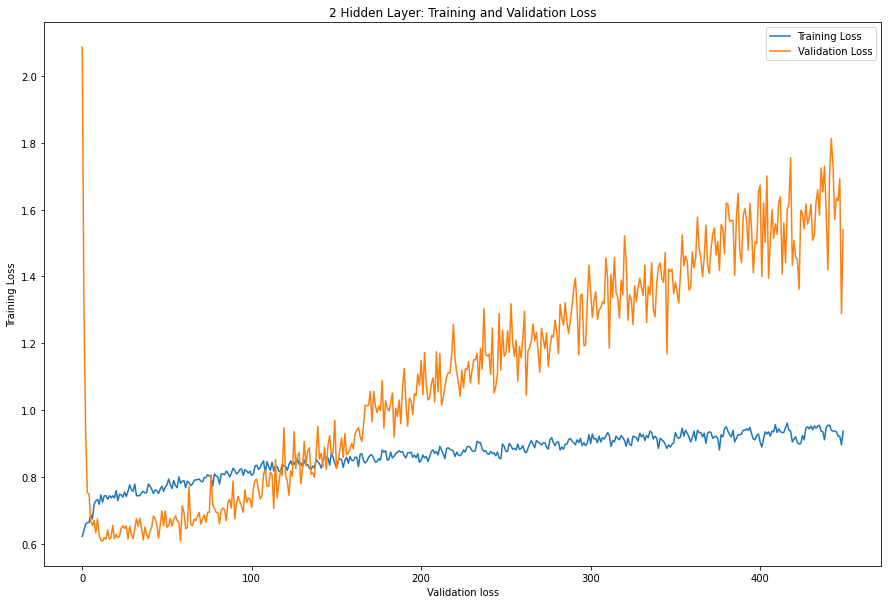

In [47]:
# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('2 Hidden Layer: Training and Validation Accuracy')
plt.ylabel('Training accuracy')
plt.xlabel('Validation accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

# Loss
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('2 Hidden Layer: Training and Validation Loss')
plt.ylabel('Training Loss')
plt.xlabel('Validation loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [37]:
#BONUS PART-3 DROPOUT IMPLEMENTATION


In [50]:
prototype2 = Sequential()
prototype2.add(Dense(500, input_dim=8, activation='relu',activity_regularizer=regularizers.l1(1e-4)))
prototype2.add(Dropout(0.2))
prototype2.add(Dense(100, activation='relu',activity_regularizer=regularizers.l1(1e-4)))
prototype2.add(Dropout(0.2))
prototype2.add(Dense(2, activation='sigmoid'))
prototype2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [51]:
epochs = 400
batch_size = 8
history2 = prototype2.fit(x_train,y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/400
58/58 [==============================] - 1s 6ms/step - loss: 2.8826 - accuracy: 0.5435 - val_loss: 1.7604 - val_accuracy: 0.4286
Epoch 2/400
58/58 [==============================] - 0s 4ms/step - loss: 1.1322 - accuracy: 0.6370 - val_loss: 0.8927 - val_accuracy: 0.6429
Epoch 3/400
58/58 [==============================] - 0s 3ms/step - loss: 0.9536 - accuracy: 0.6087 - val_loss: 0.8679 - val_accuracy: 0.6623
Epoch 4/400
58/58 [==============================] - 0s 3ms/step - loss: 0.9045 - accuracy: 0.6391 - val_loss: 0.8139 - val_accuracy: 0.6818
Epoch 5/400
58/58 [==============================] - 0s 3ms/step - loss: 0.8352 - accuracy: 0.6348 - val_loss: 0.8045 - val_accuracy: 0.6494
Epoch 6/400
58/58 [==============================] - 0s 4ms/step - loss: 0.8443 - accuracy: 0.6239 - val_loss: 0.7874 - val_accuracy: 0.6494
Epoch 7/400
58/58 [==============================] - 0s 3ms/step - loss: 0.8348 - accuracy: 0.6370 - val_loss: 0.7738 - val_accuracy: 0.6494
Epoch 8/400
5

In [53]:
print("Train acc-",history1.history["accuracy"][-1])
print("Val acc-",history1.history["val_accuracy"][-1])
print("Training loss-", history1.history["loss"][-1] )

Train acc- 0.897826075553894
Val acc- 0.6623376607894897
Training loss- 0.24957261979579926


In [54]:
test_results = prototype1.evaluate(x=x_test, y=y_test)

5/5 [==============================] - 0s 3ms/step - loss: 1.5294 - accuracy: 0.7597


In [55]:
test_results

[1.5293761491775513, 0.7597402334213257]

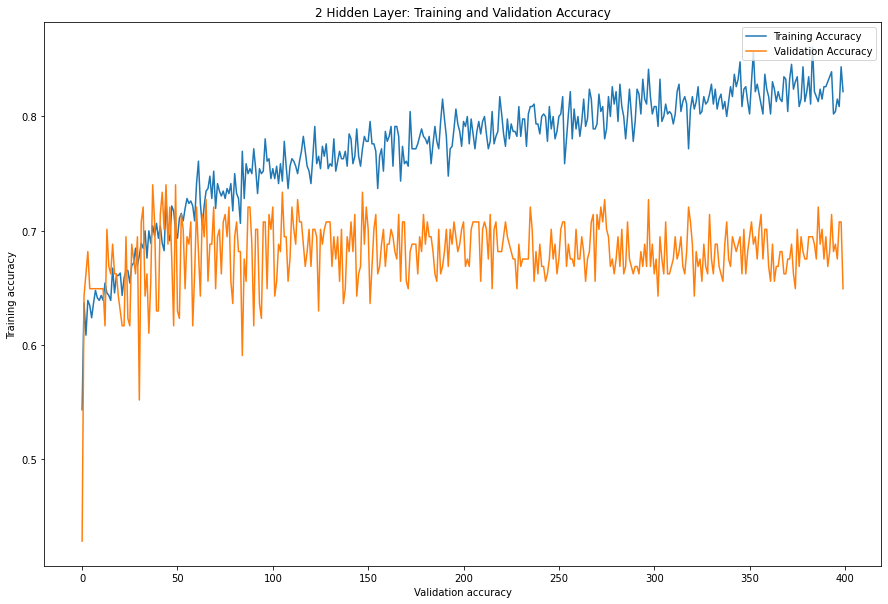

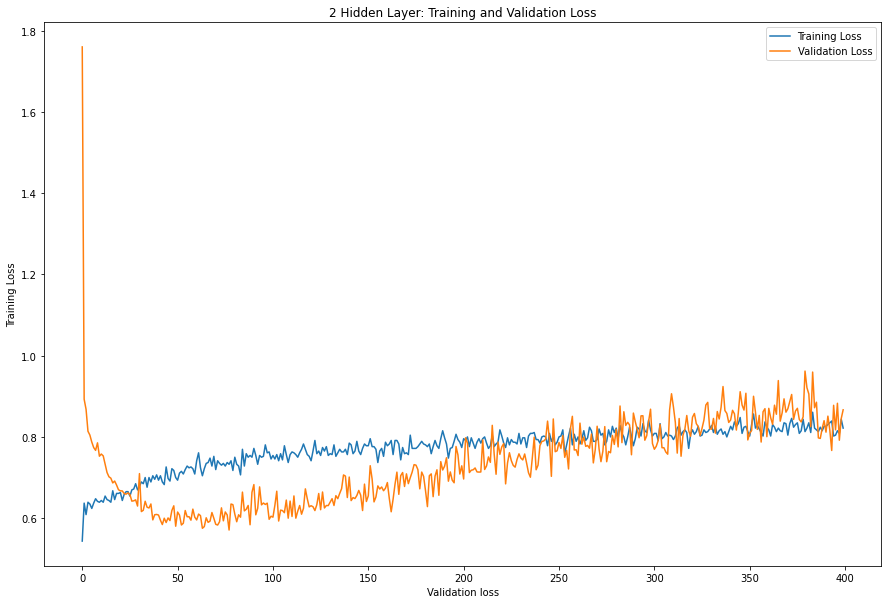

In [56]:
# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('2 Hidden Layer: Training and Validation Accuracy')
plt.ylabel('Training accuracy')
plt.xlabel('Validation accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

# Loss
plt.figure(figsize=(15, 10))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_loss'])
plt.title('2 Hidden Layer: Training and Validation Loss')
plt.ylabel('Training Loss')
plt.xlabel('Validation loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()